P = 0.02957875956354577


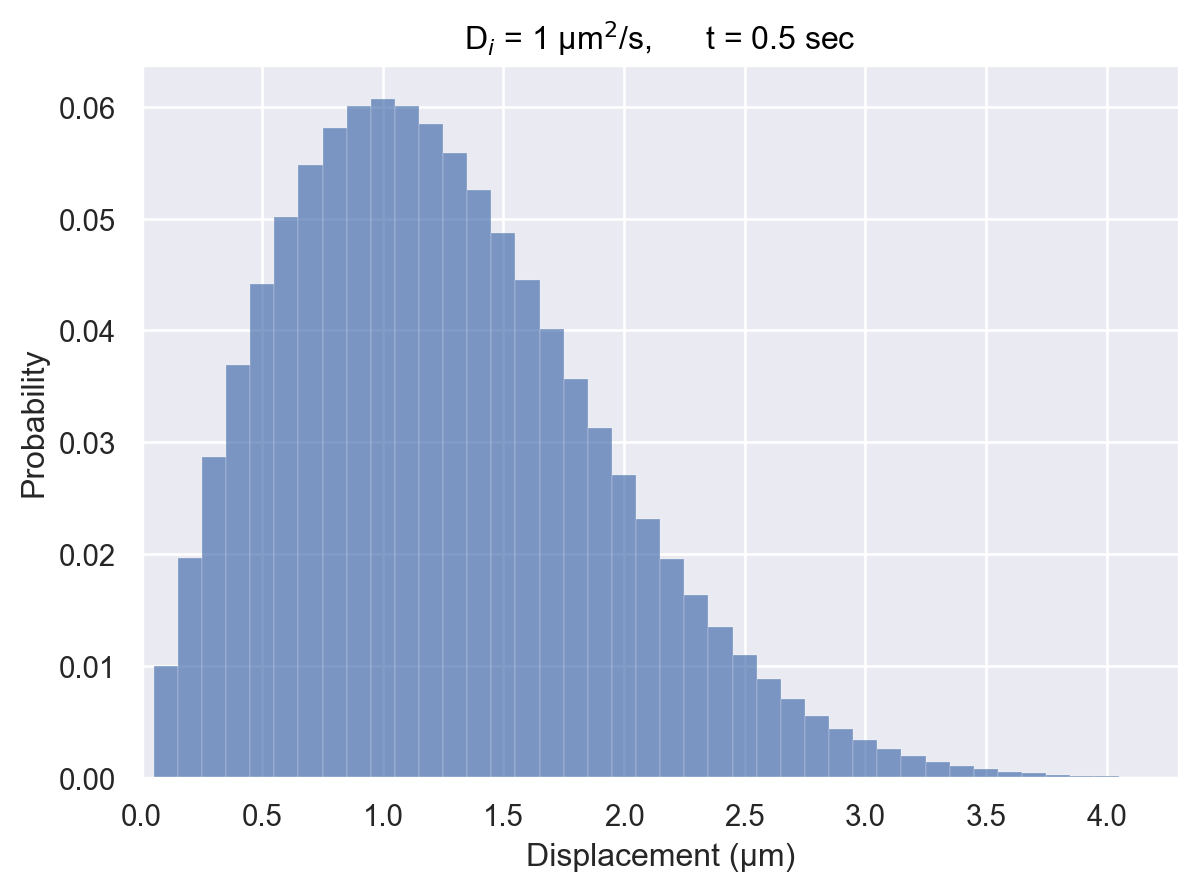

In [129]:
import pandas as pd
import numpy as np
import seaborn.objects as so 

Di = 1  # Diffusion coefficient
t = 0.5  # Frame time

# Equation based on Pinholt et al., PNAS 2021

df = (pd.DataFrame({'r':np.arange(0, 50, 0.1)})
      .assign(P_r=lambda df: df.r/(2*Di*t) * np.exp(-df.r**2/(4*Di*t)))
      .assign(P_r=lambda df: df.P_r / df.P_r.sum())
      )

xlim = df.query('P_r.cumsum() > 0.9999').r.iloc[0]

print(f'P = {df.query("r < 0.3").P_r.sum()}')

(
    so.Plot(df, x='r', y='P_r')
    .add(so.Bars())
    .label(x='Displacement (µm)', y='Probability', title=f'D$_i$ = {Di} µm$^2$/s,\t t = {t} sec')
    .limit(x=(0, xlim))
    .save(loc='D:\DanielThedie\Python\RecB_article\SI_Figures\Displacements_distribution.pdf', format='pdf', bbox_inches='tight')
)

In [39]:
import pandas as pd
import numpy as np

Di = 1  # Diffusion coefficient
times = np.arange(100, 1100, 100)  # Frame time
r_thr = np.arange(50, 550, 50) # Threshold on displacement to see a spot

spot_num = pd.DataFrame(index=r_thr, columns=times)

for time in times:
    t = time / 1000
    for thr in r_thr:
        df = (pd.DataFrame({'r':np.arange(0, 5, 0.001)})
            .assign(P_r=lambda df: df.r/(2*Di*t) * np.exp(-df.r**2/(4*Di*t)))
            .assign(P_r=lambda df: df.P_r / df.P_r.sum())
            )
        threshold = thr / 1000
        spot_num.loc[thr][time] = df.query('r < @threshold').P_r.sum() *50 *5  # Multiply by 50 to get average number of spots over 50 frames, and by 5 for the number of RecB molecules per cell

display(spot_num
        .style
        .format('{:.1f}')
        .background_gradient(subset=times, axis=None, cmap='Reds')
        )

,100,200,300,400,500,600,700,800,900,1000
50,0.2,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.6,0.3,0.2,0.2,0.2,0.2,0.1,0.1,0.1,0.1
150,1.4,0.7,0.5,0.4,0.4,0.4,0.3,0.3,0.3,0.3
200,2.5,1.3,0.9,0.8,0.7,0.6,0.6,0.6,0.6,0.5
250,3.9,2.0,1.5,1.2,1.1,1.0,0.9,0.9,0.9,0.8
300,5.6,2.9,2.1,1.8,1.6,1.4,1.4,1.3,1.2,1.2
350,7.5,4.0,2.9,2.4,2.1,2.0,1.8,1.8,1.7,1.6
400,9.8,5.2,3.8,3.1,2.8,2.6,2.4,2.3,2.2,2.1
450,12.3,6.5,4.8,4.0,3.5,3.2,3.0,2.9,2.8,2.7
500,15.1,8.0,5.9,4.9,4.3,4.0,3.8,3.6,3.4,3.3


### Trying to simulate the spot lifetime histogram

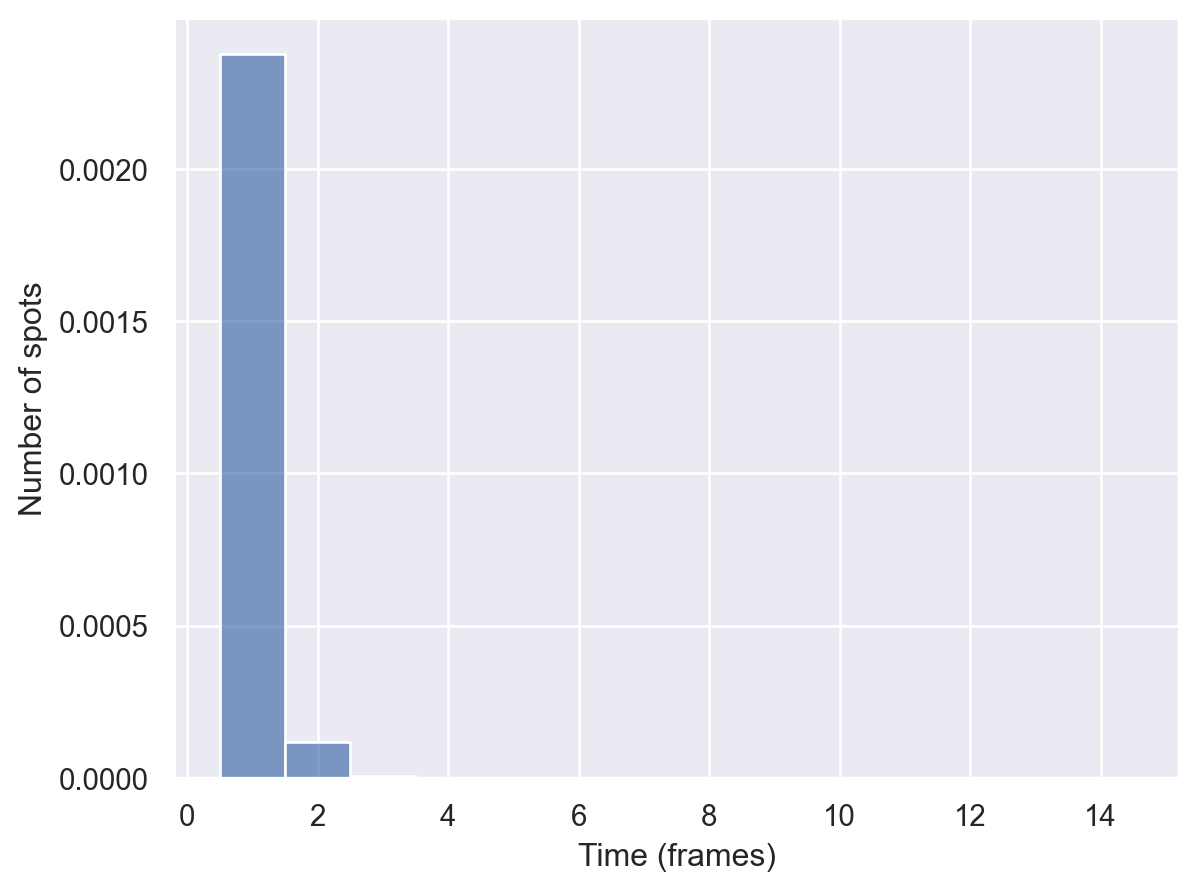

In [126]:
import pandas as pd
import numpy as np
import seaborn.objects as so

p_spot = 1-0.05
time = np.arange(1, 15, 1)
P_x = (1-p_spot)**(time+1)*p_spot

lifetime_simul = pd.DataFrame({'Time': time, 'SpotCount': P_x})

(
    so.Plot(lifetime_simul, x='Time', y='SpotCount')
    .add(so.Bars(), legend=False)
    .label(x='Time (frames)', y='Number of spots')
)